In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow

from glob import glob
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png'
file_path = '/CLD00194_RGB_K3A_NIA1041.png'

img = cv2.imread(dir_path + file_path)

In [ ]:
img.shape

(5520, 6015, 3)

In [ ]:
img[:1000][:1000].shape

(1000, 6015, 3)

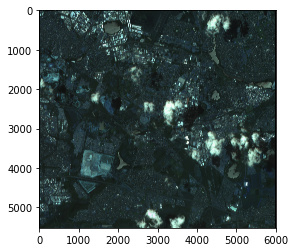

In [ ]:
plt.imshow(img[:,:,:]); plt.show()

### 1000 픽셀 패치

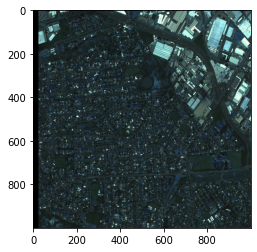

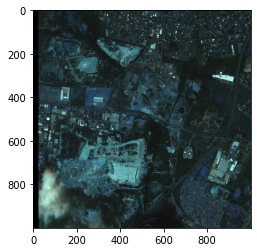

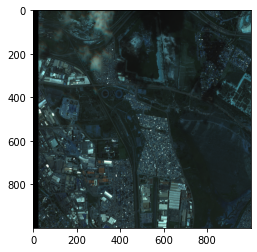

In [ ]:
for i in range(0,3):
    plt.imshow(img[i*1000 : i*1000+1000, :1000, :]); plt.show()

### 100 픽셀 패치

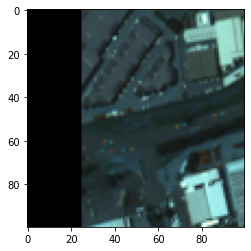

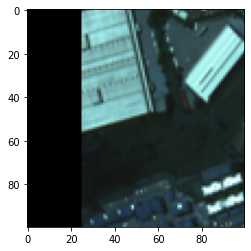

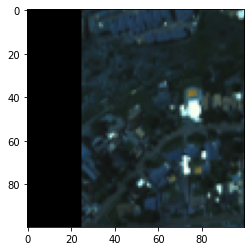

In [ ]:
for i in range(0,3):
    plt.imshow(img[i*100 : i*100+100, :100, :]); plt.show()

# RGB File만 받아오기

In [ ]:
dir_path = '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/'
img_dir_path = os.path.join(dir_path, 'png')

In [ ]:
img_dir_path

'/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png'

In [ ]:
file_list = os.listdir(img_dir_path)
print(file_list[0])
print(len(file_list))

CLD00001_NGR_K3A_NIA0001.png
260


In [ ]:
rgb_path_list = glob(os.path.join(img_dir_path,"*RGB*png"))
print(rgb_path_list[:10])
print(len(rgb_path_list))

['/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00001_RGB_K3A_NIA0001.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00003_RGB_K3A_NIA0003.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00004_RGB_K3A_NIA0004.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00005_RGB_K3A_NIA0005.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00008_RGB_K3A_NIA0008.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00011_RGB_K3A_NIA0011.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00012_RGB_K3A_NIA0012.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00013_RGB_K3A_NIA0013.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00016_RGB_K3A_NIA0016.png', '/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00017_RGB_K3A_NIA0017.png']

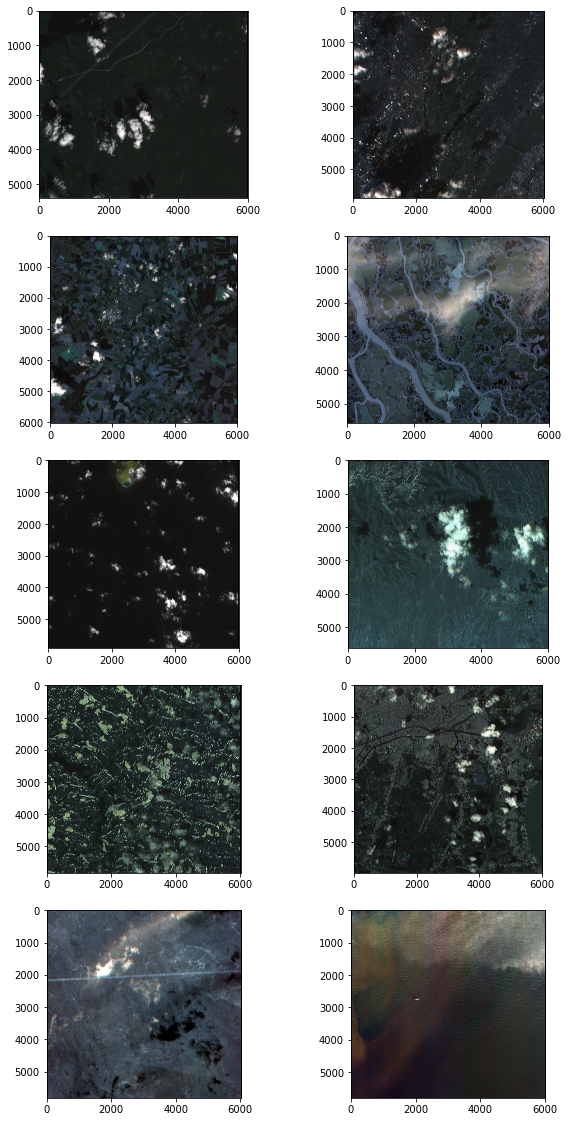

In [ ]:
plt.figure(figsize =(10,20))
for i in range(10):
    rgb_img_path = os.path.join(rgb_path_list[i])
    rgb_img = cv2.imread(rgb_img_path)
    plt.subplot(5,2,i+1)
    plt.imshow(rgb_img)
plt.show()

# 데이터 확인

In [ ]:
rgb_path_list[0]

'/content/drive/MyDrive/Cloud_data/cloud_train/train_clouds_data/png/CLD00001_RGB_K3A_NIA0001.png'

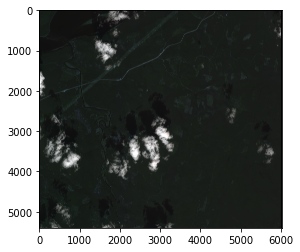

In [ ]:
img = cv2.imread(rgb_path_list[0])
plt.imshow(img); plt.show()

1000x1000픽셀로 확인 했을때 왼쪽 공간이 있는것을 발견

In [ ]:
img.shape

(5400, 6015, 3)

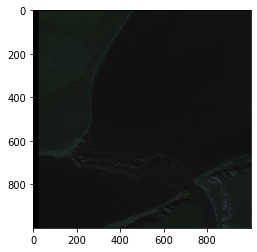

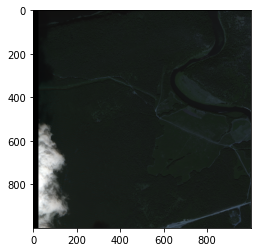

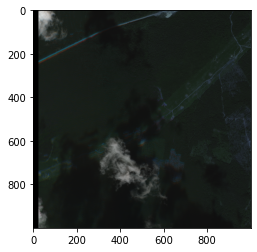

In [ ]:
for i in range(0,3):
    plt.imshow(img[i*1000 : i*1000+1000, :1000, :]); plt.show()

약 20픽셀정도 검은 여백이 확인됐다.

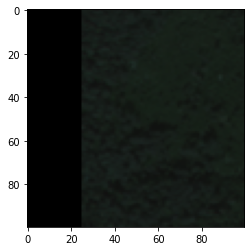

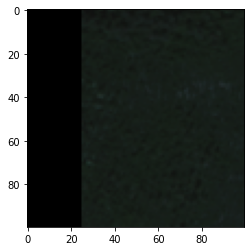

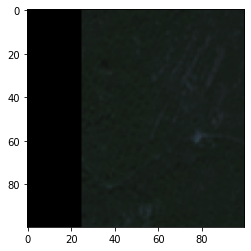

In [ ]:
for i in range(0,3):
    plt.imshow(img[i*100 : i*100+100, :100, :]); plt.show()

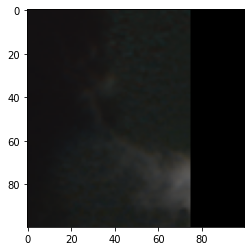

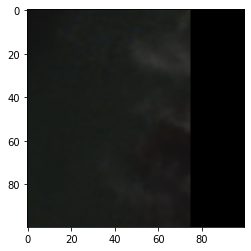

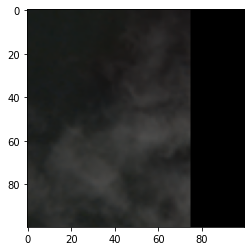

In [ ]:
for i in range(0,3):
    plt.imshow(img[i*100 : i*100+100, -100: , :]); plt.show()

원래 이미지 크기

In [ ]:
img.shape

(5400, 6015, 3)

검은 여백을 제거한 이미지 크기

In [ ]:
ind, num = np.where(img[:1,:,1] == 0)

In [ ]:
ind.size

50

(5900, 6015, 3)


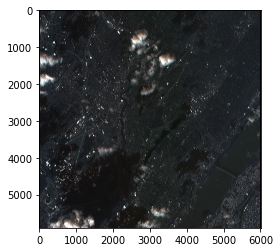

In [ ]:
img2 = cv2.imread(rgb_path_list[1])
print(img2.shape)
plt.imshow(img2); plt.show()

(5900, 6015, 3)
양 옆에 25픽셀씩 공백이 존재하므로   

여백 없는 사진의 shape은
(5900, 5965, 3)

In [ ]:
ind, num = np.where(img2[:1,:,1] == 0)
print(ind.size)

50


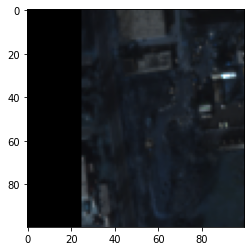

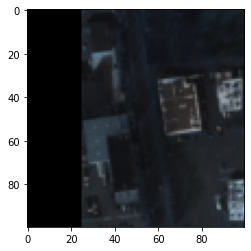

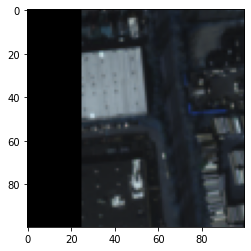

In [ ]:
for i in range(0,3):
    plt.imshow(img2[i*100 : i*100+100, :100, :]); plt.show()

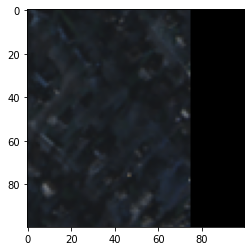

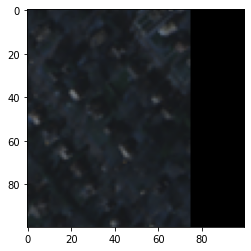

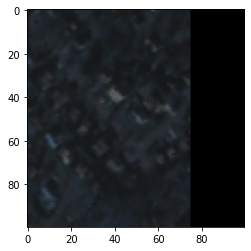

In [ ]:
for i in range(0,3):
    plt.imshow(img2[i*100 : i*100+100, -100 :, :]); plt.show()

In [ ]:
img2[:1,:,1].shape

(1, 6015)

In [ ]:
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_img.shape

(5900, 6015)

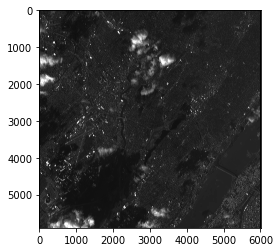

In [ ]:
plt.imshow(gray_img, cmap=plt.cm.gray); plt.show()

In [ ]:
ind = np.where(gray_img[0] == 0)

In [ ]:
list(ind)

[array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997,
        5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008,
        6009, 6010, 6011, 6012, 6013, 6014])]

# Tensor